In [1]:
import pandas as pd
from numpy import arange
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.collections import PolyCollection
import os

In [2]:
run_dir = 'data/RR_10'

In [3]:
stat_stats = {
    'processes': ['running', 'switching', 'ready', 'blocked', 'exit'],
    'cpus': ['processing', 'assigned_idle', 'idle', 'switching_out', 'switching_in']
}
in_dir = f"inputs"
out_dir = f"outputs"
in_type = 'csv'
out_type = 'jpg'
tick_separation = 1
bar_width = 0.9
bar_pm = bar_width/2

curr_dir = run_dir
for run_folder in os.listdir(curr_dir):
    if run_folder.find('.') == -1:
        curr_dir = f"{run_dir}/{run_folder}"
        for chart_folder in os.listdir(curr_dir):
            curr_dir = f"{run_dir}/{run_folder}/{chart_folder}"
            for type_folder in os.listdir(curr_dir):
                curr_dir = f"{run_dir}/{run_folder}/{chart_folder}/{type_folder}"
                states = stat_stats[type_folder]
                cats = {states[i]:(i+1)*tick_separation for i in range(0, len(states))}
                color_map = {states[i]:f"C{i}" for i in range(0, len(states))}
                try:
                    os.mkdir(f"{curr_dir}/{out_dir}")
                except OSError:
                    0
                else:
                    print(f"Created output folder {curr_dir}/{out_dir}")
                    for filename in os.listdir(f"{curr_dir}/{in_dir}"):
                        if filename.endswith(f".{in_type}"):
                            df = pd.read_csv(f"{curr_dir}/{in_dir}/{filename}")
                            colors = [color_map[row[0]] for row in df.values]
                            fig, ax = plt.subplots()
                            # CHART TYPE SPLIT
                            if chart_folder == 'timelines':
                                df.columns = ['state', 'start']
                                df['start'] = df.expanding(1).sum()
                                df['end'] = df['start']
                                df['start'] = df['start'].shift(1)
                                df.at[0, 'start'] = 0

                                verts = [[(row[1], cats[row[0]]-bar_pm), (row[1], cats[row[0]]+bar_pm), (row[2], cats[row[0]]+bar_pm), (row[2], cats[row[0]]-bar_pm), (row[1], cats[row[0]]-bar_pm)] for row in df.values]

                                bars = PolyCollection(verts, facecolors=colors)
                                ax.add_collection(bars)
                                ax.autoscale()

                                if tick_separation == 0:
                                    plt.legend(handles=[mpatches.Patch(color=m[1], label=m[0]) for m in color_map.items()])
                                    ax.set_yticks([])
                                else:
                                    ax.set_yticks(arange(tick_separation, (len(states)+1)*tick_separation, tick_separation))
                                    ax.set_yticklabels(states)
                            elif chart_folder == 'piecharts':
                                df.columns = ['state', 'length']
                                ax.pie(df['length'], labels=df['state'], colors=colors, autopct='%1.1f%%')
                                ax.axis('equal')
                            
                            plt.savefig(f"{curr_dir}/{out_dir}/{filename.rstrip(in_type)}{out_type}")
                            #print(f"Created plot {curr_dir}/{out_dir}/{filename.rstrip(in_type)}{out_type}")
                            plt.close()

Created output folder data/RR_10/10_50_10_7_3/piecharts/cpus/outputs
Created output folder data/RR_10/10_50_10_7_3/piecharts/processes/outputs
Created output folder data/RR_10/10_50_10_7_3/timelines/cpus/outputs
Created output folder data/RR_10/10_50_10_7_3/timelines/processes/outputs
Created output folder data/RR_10/1_50_10_7_3/piecharts/cpus/outputs
Created output folder data/RR_10/1_50_10_7_3/piecharts/processes/outputs
Created output folder data/RR_10/1_50_10_7_3/timelines/cpus/outputs
Created output folder data/RR_10/1_50_10_7_3/timelines/processes/outputs
Created output folder data/RR_10/2_50_10_7_3/piecharts/cpus/outputs
Created output folder data/RR_10/2_50_10_7_3/piecharts/processes/outputs
Created output folder data/RR_10/2_50_10_7_3/timelines/cpus/outputs
Created output folder data/RR_10/2_50_10_7_3/timelines/processes/outputs
Created output folder data/RR_10/3_50_10_7_3/piecharts/cpus/outputs
Created output folder data/RR_10/3_50_10_7_3/piecharts/processes/outputs
Created o

,Settings,Process Length,Turnaround,Wait,Response,Response Adjusted,Throughput,Throughput INV,Throughput CPU,CPU Processing%
0,1_50_10_7_3,1839.7,28569.0,26729.0,21176.0,123.0600,0.000861,1161.50,1161.500,48.689
1,2_50_10_7_3,1839.7,14210.0,12370.0,9947.2,57.8880,0.001680,595.40,297.700,47.489
2,3_50_10_7_3,1839.7,9577.2,7737.5,6152.6,35.6370,0.002458,406.92,135.640,46.324
3,6_50_10_7_3,1839.7,4933.6,3093.9,2274.3,12.9950,0.004312,231.90,38.650,40.643
4,10_50_10_7_3,1839.7,3176.7,1337.0,876.1,4.9179,0.006018,166.18,16.618,34.029


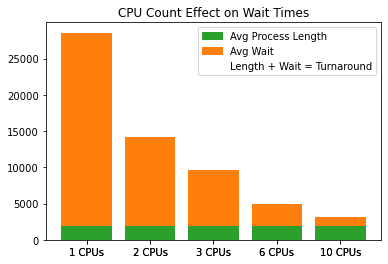

In [4]:
def list_stretch(l, n):
    return [i2 for i in l for i2 in [i]*n]

# from https://stackoverflow.com/a/7946825
def list_interleave(l):
    return [val for tup in zip(*l) for val in tup]
    
df = pd.read_csv(f"{run_dir}/summary.csv")

settings = [f"{i} CPUs" for i in [1,2,3,6,10]] #df['Settings']

colors = list_interleave([["C2"] * len(settings), ["C1"] * len(settings)])
labels = list_stretch(settings, 2)
xs = list_stretch(range(len(settings)), 2)
ys = list_interleave([df['Process Length'], df['Wait']])
bot = list_interleave([[0] * len(settings), ys[::2]])

plt.bar(xs, ys, bottom=bot, color=colors, tick_label=labels)
plt.title("CPU Count Effect on Wait Times")
plt.legend(handles=[mpatches.Patch(color=m[1], label=m[0]) for m in [["Avg Process Length", "C2"], ["Avg Wait", "C1"], ["Length + Wait = Turnaround", "w"]]])
plt.savefig(f"{run_dir}/CPU_vs_wait.{out_type}")

df.head()

In [ ]:
run_dir = 'data/RR_201'

In [ ]:
df = pd.read_csv(f"{run_dir}/summary.csv")

cpus = [1,2,3,6,10]
settings = [f"{i} CPUs" for i in cpus] #df['Settings']
color_map = {settings[i]:f"C{i+1}" for i in range(len(settings))}

colors = [color_map[s] for s in [settings[1]]*len(settings)]
labels = settings
xs = range(len(settings))
ys = df['Response Adjusted']

plt.bar(xs, ys, color=colors, tick_label=labels)
plt.title("CPU Count Effect on Adjusted Response")
plt.ylabel("Adjusted Response")
#plt.legend(handles=[mpatches.Patch(color=m[1], label=m[0]) for m in color_map.items()])
plt.savefig(f"{run_dir}/CPU_vs_response.{out_type}")

In [ ]:
df = pd.read_csv(f"{run_dir}/summary.csv")

settings = ["RR 201", "RR 100", "RR 50", "FCFS"] #df['Settings']

colors = list_interleave([["C2"] * len(settings), ["C1"] * len(settings)])
labels = list_stretch(settings, 2)
xs = list_stretch(range(len(settings)), 2)
ys = list_interleave([df['Process Length'], df['Wait']])
bot = list_interleave([[0] * len(settings), ys[::2]])

plt.bar(xs, ys, bottom=bot, color=colors, tick_label=labels)
plt.title("Algorithm Effect on Wait Times")
plt.legend(handles=[mpatches.Patch(color=m[1], label=m[0]) for m in [["Avg Process Length", "C2"], ["Avg Wait", "C1"], ["Length + Wait = Turnaround", "w"]]])
plt.savefig(f"{run_dir}/Algo_vs_wait.{out_type}")

df.head()

In [ ]:
df = pd.read_csv(f"{run_dir}/summary.csv")

settings = ["RR 201", "RR 100", "RR 50", "FCFS"] #df['Settings']
color_map = [{settings[i]:f"C{i+1}" for i in range(len(settings))}]

colors = ["C2"] * len(settings)
labels = settings
xs = range(len(settings))
ys = df['CPU Processing%']

plt.bar(xs, ys, color=colors, tick_label=labels)
plt.title("Algo Effect on Throughput per CPU")
plt.ylabel("Throughput per CPU")
plt.ylim(top=100)
#plt.legend(handles=[mpatches.Patch(color=m[1], label=m[0]) for m in color_map.items()])
plt.savefig(f"{run_dir}/Algo_vs_throughput_cpu.{out_type}")

In [ ]:
df.head()